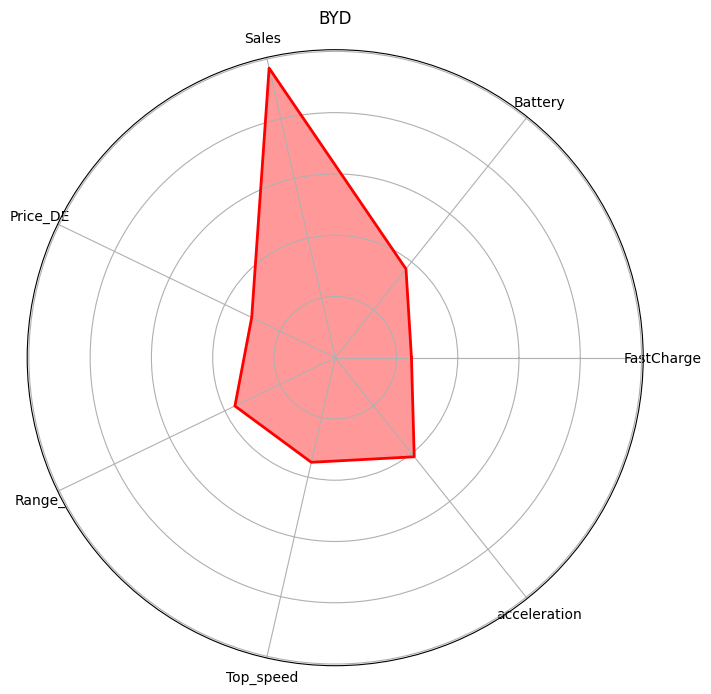

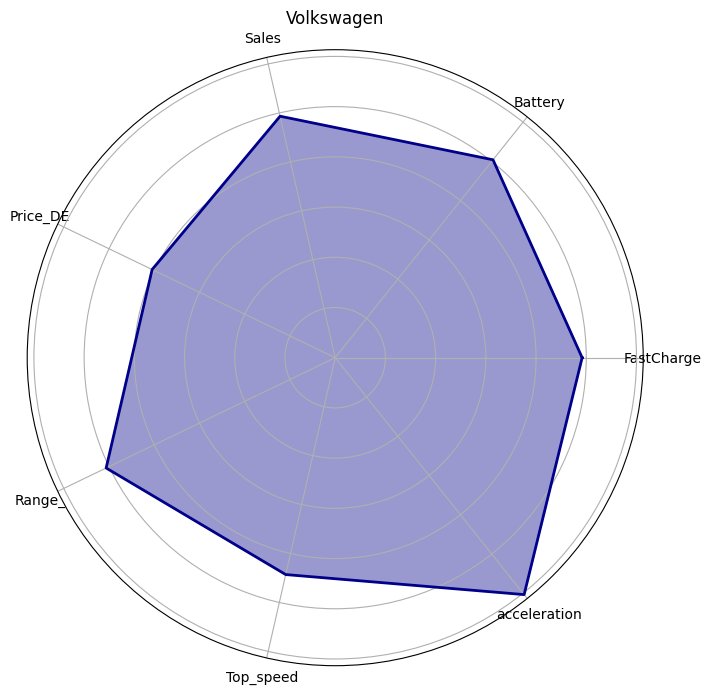

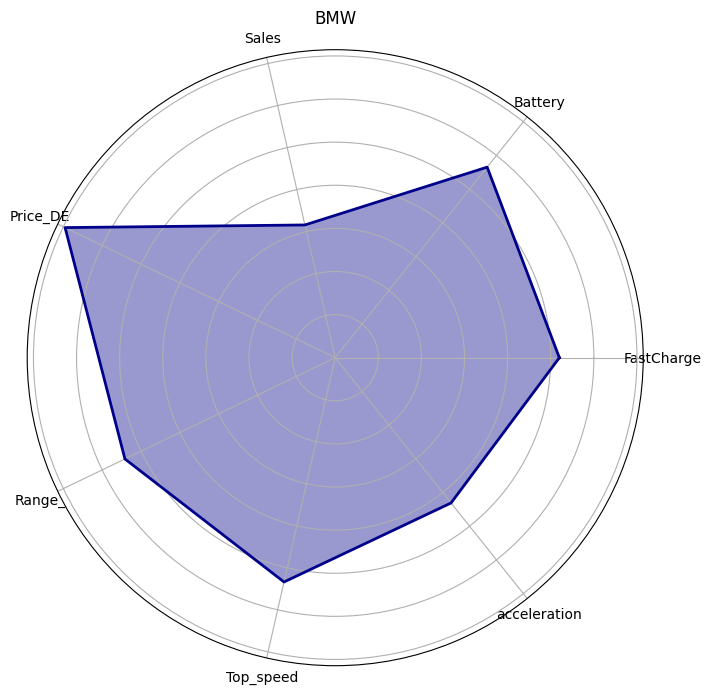

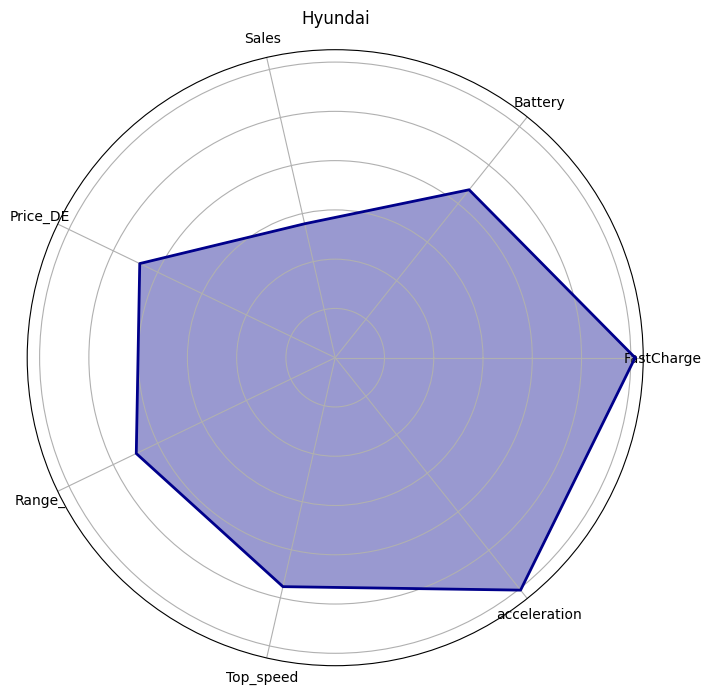

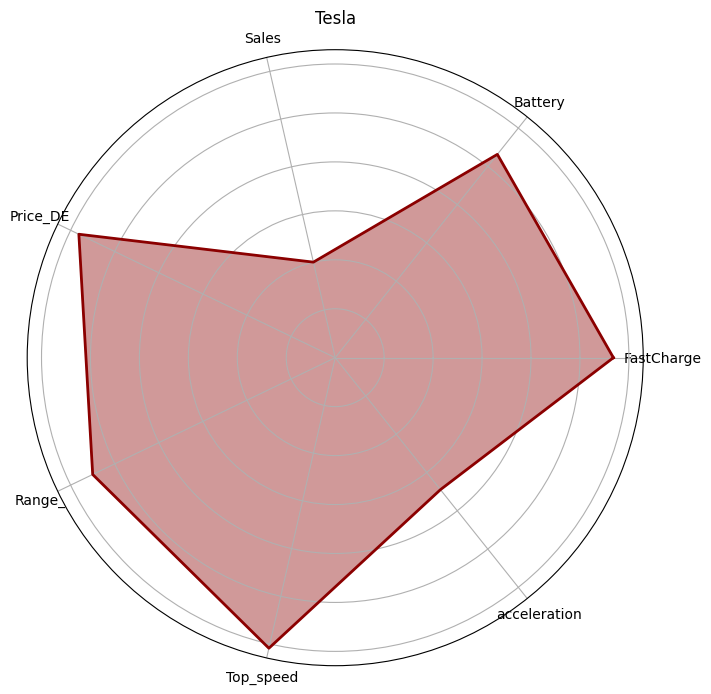

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 브랜드 데이터
data = {
    'Brand': ['BYD', 'Volkswagen', 'BMW', 'Hyundai', 'Tesla'],
    'FastCharge': [386, 610, 645, 755, 705],
    'Battery': [68, 74, 83, 64, 78],
    'Sales': [928292, 377870, 241948, 213596, 153365],
    'Price_DE': [48350, 51735, 88920, 56298, 74314],
    'Range_': [375, 418, 447, 370, 454],
    'Top_speed': [169, 171, 206, 184, 235],
    'acceleration': [6, 7, 5, 7, 4]
}

# 브랜드 대표 색상
brand_colors = {
    'BYD': 'red',
    'Volkswagen': 'darkblue',
    'BMW': 'darkblue',
    'Hyundai': 'darkblue',
    'Tesla': 'darkred'
}

# 판다스 데이터프레임 생성
df = pd.DataFrame(data)

# 브랜드를 인덱스로 설정
df.set_index('Brand', inplace=True)

# 각 컬럼의 평균 계산
column_means = df.mean()

# 각 브랜드의 값에 대한 비율 계산
brand_ratios = df.div(column_means).dropna(axis=1)

# 레이더 차트 그리기
for index, row in brand_ratios.iterrows():
    brand = index
    values = row.values

    labels = df.columns
    num_vars = len(labels)

    # 각 변수 각도 계산
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # 처음 값 추가하여 차트를 닫음
    values = np.concatenate((values, [values[0]]))

    # 레이더 차트 그리기
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color=brand_colors.get(brand, 'blue'), linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=brand_colors.get(brand, 'blue'), alpha=0.4)

    ax.set_yticklabels([])
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(brand)

plt.show()
